In [32]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.svm import SVR
from sklearn.cluster import KMeans
#others
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

base_dir = "../dataset"

In [17]:
df_data_by_year = pd.read_excel(f"{base_dir}/FilledDataset2012.xlsx", sheet_name="Data_in")
df_data_by_year = df_data_by_year.replace(r'^\s*$', np.nan, regex=True).dropna()
df_locations = pd.read_csv(f"{base_dir}/SKNlocations.csv")
df_data_by_year.head()

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
5,1.0,1925,1.2,0.67,4.90,0.39,0.03,2.18,0.1,0.16,0.08,0.22,0.93,0.71
6,1.0,1926,0.96,0.11,0.07,0.00,0.90,0.17,0.0,2.05,0,0.05,0.1,0.57
7,1.0,1927,0.12,0.02,1.94,4.61,0.04,0.44,0.0,0.02,3.56,0.72,0.07,10.86
8,1.0,1928,0.01,0,0.50,0.61,0.02,0.13,1.5,0,0.03,0.02,0,0.80
9,1.0,1929,4.34,2.76,0.80,0.04,0.13,0,0.0,1,1,0,12.88,0.86


In [18]:
df_locations

,SKN,Name,Lat_DD,Lon_DD
0,1.0,KALAE,18.916176,-155.674994
1,1.1,MORSE FIELD,18.913680,-155.680550
2,1.2,KALAE S TRK STA,18.938669,-155.680549
3,2.0,MANUKA,19.108660,-155.825545
4,2.1,KAHUKU MAUKA 2.10,19.108890,-155.746670
...,...,...,...,...
2219,1143.0,FIELD 30,22.202190,-159.347203
2220,1144.0,FIELD 7-A,22.186077,-159.318870
2221,1145.0,PUU AUAU,22.182760,-159.332203
2222,1146.0,Moloaa Dairy,22.183333,-159.337500


In [27]:
df_data_by_year_aggregated = df_data_by_year.groupby("SKN").agg(["mean"]).reset_index()
df_data_by_year_aggregated.head()

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1.0,1936.086957,2.755652,1.947391,2.936328,1.201739,0.444783,0.497826,0.433043,0.946087,0.847391,0.895217,2.056522,2.024348
1,1.1,1940.500000,0.405000,0.365000,2.485000,0.725000,0.565000,0.535000,0.615000,2.060000,4.705000,2.945000,2.740000,0.695000
2,1.2,1967.000000,2.913333,2.700000,1.520000,2.120000,1.210000,1.186667,1.190000,0.863333,1.553333,1.800000,3.610000,7.053333
3,2.0,1965.000000,3.344725,2.898132,3.242308,3.485891,3.563297,2.189208,4.236923,2.441094,3.105385,2.093956,2.691429,2.464835
4,2.1,2007.500000,1.040000,4.230000,0.545000,0.565000,0.320000,0.425000,0.960000,1.400000,0.985000,0.455000,3.880000,7.270000


In [28]:
df_data_by_year_aggregated.columns = df_data_by_year_aggregated.columns.droplevel(1)

In [29]:
df_data_by_year_aggregated

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1.0,1936.086957,2.755652,1.947391,2.936328,1.201739,0.444783,0.497826,0.433043,0.946087,0.847391,0.895217,2.056522,2.024348
1,1.1,1940.500000,0.405000,0.365000,2.485000,0.725000,0.565000,0.535000,0.615000,2.060000,4.705000,2.945000,2.740000,0.695000
2,1.2,1967.000000,2.913333,2.700000,1.520000,2.120000,1.210000,1.186667,1.190000,0.863333,1.553333,1.800000,3.610000,7.053333
3,2.0,1965.000000,3.344725,2.898132,3.242308,3.485891,3.563297,2.189208,4.236923,2.441094,3.105385,2.093956,2.691429,2.464835
4,2.1,2007.500000,1.040000,4.230000,0.545000,0.565000,0.320000,0.425000,0.960000,1.400000,0.985000,0.455000,3.880000,7.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1142.0,1963.500000,7.217955,5.361477,6.917614,5.166250,4.305341,2.090455,3.159659,2.945114,2.704205,5.418409,6.674318,6.384091
1896,1143.0,1963.500000,6.627841,4.674659,5.382727,4.865341,4.055795,2.201477,2.641591,2.862614,2.625568,4.528068,5.530114,5.580909
1897,1144.0,1963.500000,6.327273,4.583409,5.688636,4.161250,3.577386,1.769432,2.358977,2.405682,2.035114,4.884318,5.326818,5.387500
1898,1145.0,1965.043956,6.019670,4.764835,5.536264,4.529890,3.640659,1.882637,2.627692,2.371978,2.197802,4.670220,5.368791,5.262857


In [30]:
df_complete = df_data_by_year_aggregated.merge(right=df_locations, left_on="SKN", right_on="SKN")
df_complete.head()

,SKN,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Name,Lat_DD,Lon_DD
0,1.0,1936.086957,2.755652,1.947391,2.936328,1.201739,0.444783,0.497826,0.433043,0.946087,0.847391,0.895217,2.056522,2.024348,KALAE,18.916176,-155.674994
1,1.1,1940.500000,0.405000,0.365000,2.485000,0.725000,0.565000,0.535000,0.615000,2.060000,4.705000,2.945000,2.740000,0.695000,MORSE FIELD,18.913680,-155.680550
2,1.2,1967.000000,2.913333,2.700000,1.520000,2.120000,1.210000,1.186667,1.190000,0.863333,1.553333,1.800000,3.610000,7.053333,KALAE S TRK STA,18.938669,-155.680549
3,2.0,1965.000000,3.344725,2.898132,3.242308,3.485891,3.563297,2.189208,4.236923,2.441094,3.105385,2.093956,2.691429,2.464835,MANUKA,19.108660,-155.825545
4,2.1,2007.500000,1.040000,4.230000,0.545000,0.565000,0.320000,0.425000,0.960000,1.400000,0.985000,0.455000,3.880000,7.270000,KAHUKU MAUKA 2.10,19.108890,-155.746670


In [39]:
X = df_complete.iloc[:, 2:14]

In [50]:
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(X)
df_complete["label"] = label

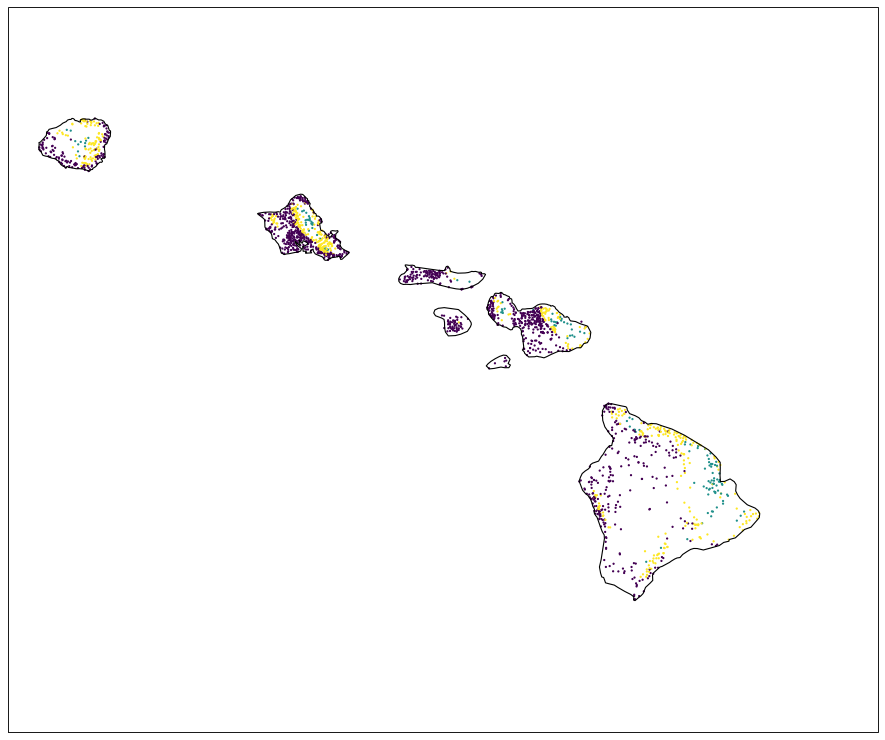

In [65]:
plt.figure(figsize=(20, 12), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())


ax.set_xlim(-160, -154)
ax.set_ylim(18, 23)



lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

plt.scatter(df_complete["Lon_DD"], df_complete["Lat_DD"], s=1, marker='o', c=label)


ax.coastlines(resolution='10m')

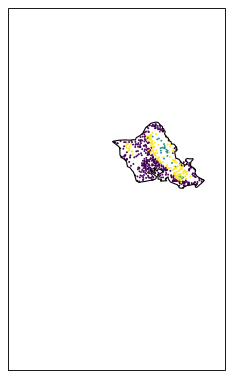

In [60]:
plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection=ccrs.PlateCarree())


# ax.set_xlim(-160, -155)
# ax.set_ylim(18, 23)
ax.set_xlim(-159, -157.5)
ax.set_ylim(20, 22.5)
# ax.set_xticks([-160, -157.5, -155, -152.5], crs=ccrs.PlateCarree())
# ax.set_yticks([17.5, 20, 22.5, 25])



lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

plt.scatter(df_complete["Lon_DD"], df_complete["Lat_DD"], s=0.5, marker='o', c=label)


ax.coastlines(resolution='10m')